# StyleGAN Implementation

### Dataset Used: Flickr-Faces-HQ Dataset (FFHQ)  |  Pre-trained networks

In [1]:
!git clone https://github.com/NVlabs/stylegan.git

Cloning into 'stylegan'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 89 (delta 0), reused 1 (delta 0), pack-reused 86
Unpacking objects: 100% (89/89), done.


In [48]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [56]:
ls

cache/            generate_figures.py*    __pycache__/          training/
config.py*        LICENSE.txt*            README.md*            train.py*
dataset_tool.py*  metrics/                run_metrics.py*
dnnlib/           pretrained_example.py*  stylegan-teaser.png*


In [30]:
!pip install --upgrade pip==20.2

#!pip install tensorflow==1.15.5  
!pip install tensorflow-gpu==1.15  #GPU

Requirement already up-to-date: pip==20.2 in /usr/local/lib/python3.7/dist-packages (20.2)


In [57]:
import tensorflow as tf
if tf.test.gpu_device_name():
 print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
 print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [178]:

# Loading Generator
import os
import pickle
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import config



# Initialize TensorFlow.
tflib.init_tf()

# Load pre-trained network. The pre-trained networks are stored as standard pickle files on Google Drive
url = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ' # karras2019stylegan-ffhq-1024x1024.pkl

with dnnlib.util.open_url(url, cache_dir=config.cache_dir) as f:
    _G, _D, Gs = pickle.load(f)
    #To generate images, you will use Gs – the other two networks are provided for completeness. #You can ignore _G and _D

In [182]:
#Select a latent vector
# Pick latent vector.
rnd = np.random.RandomState(0)
latents = rnd.randn(1, Gs.input_shape[1])

#Different images can be generated by changing the RandomState value (200 in the above code) set when selecting the latent vector.

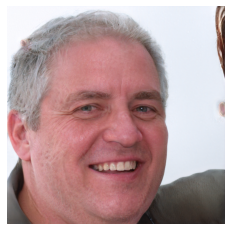

0


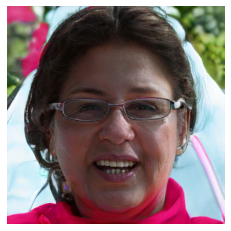

1


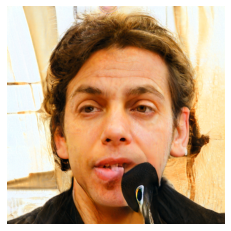

2


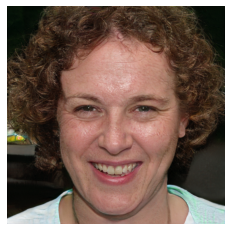

3


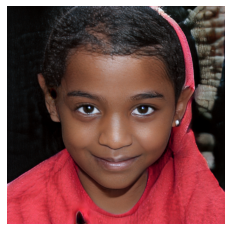

4


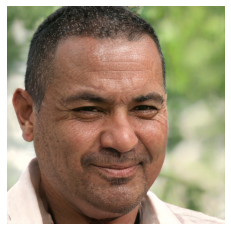

5


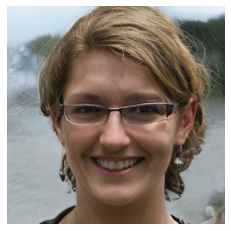

6


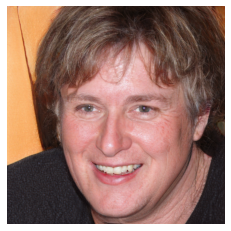

7


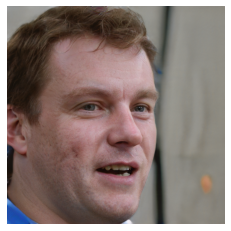

8


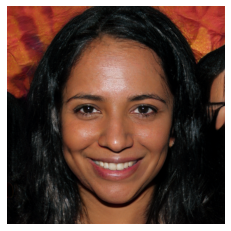

9


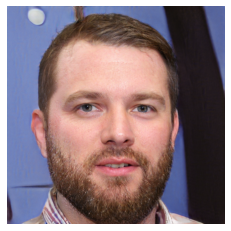

10


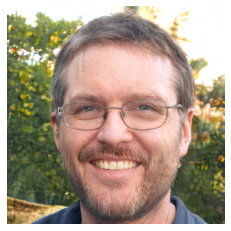

11


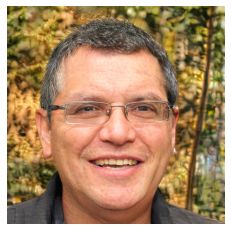

12


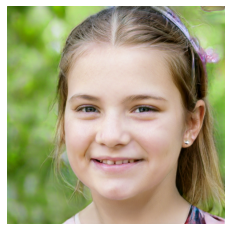

13


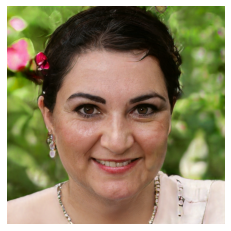

14


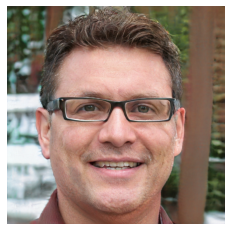

15


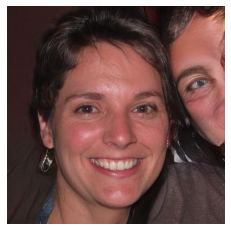

16


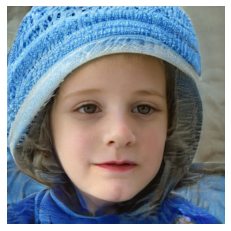

17


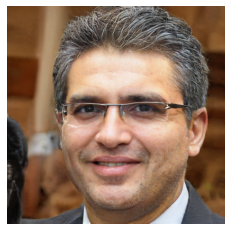

18


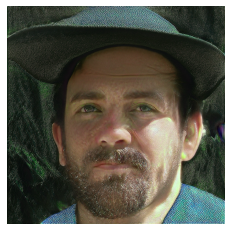

19


In [183]:
from google.colab import files

for i in range (20):
  rnd = np.random.RandomState(i)
  latents = rnd.randn(1, Gs.input_shape[1])
  fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
  images = Gs.run(latents, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)
  os.makedirs(config.result_dir, exist_ok=True)
  img_png = str(i)+'.png'
  png_filename = os.path.join(config.result_dir, img_png)
  PIL.Image.fromarray(images[0], 'RGB').save(png_filename)
  #files.download("results/"+img_png)
  showimg(i)
  print (i)

In [180]:
# Try to display the generated image on Google Colaboratory
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def showimg(i):

  #Do not show lines in the image
  fig,ax = plt.subplots()
  ax.tick_params(labelbottom="off",bottom="off")
  ax.tick_params(labelleft="off",left="off")
  ax.set_xticklabels([]) 
  ax.axis('off')
  #Image loading
  im = Image.open("results/"+(str(i)+'.png'))
  #Convert image to array
  im_list = np.asarray(im)
  #貼り付け
  plt.imshow(im_list)

  plt.show()

In [113]:
# Generate image.
fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
images = Gs.run(latents, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)

#You can change the value of truncation_psi (0.7 in the above code), between -1 and 1. 

#All face images at the beginning were generated with truncation_psi = 0.7
# Let's say if you set it to 3 or some other big number, then generated images will be too far from the real image and it will be a strange image.　

In [108]:
#!nvidia-smi

In [114]:
# Save image.
os.makedirs(config.result_dir, exist_ok=True)
png_filename = os.path.join(config.result_dir, 'example200.png')
PIL.Image.fromarray(images[0], 'RGB').save(png_filename)

# Set the name of the image file freely in place of'example200'and execute as it is

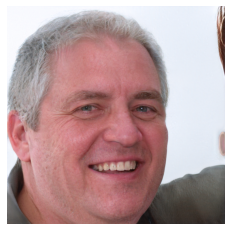

In [115]:
# Try to display the generated image on Google Colaboratory
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


#Do not show lines in the image
fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')
#Image loading
im = Image.open("results/example200.png")
#Convert image to array
im_list = np.asarray(im)
#貼り付け
plt.imshow(im_list)

plt.show()

In [105]:
# Download this image
from google.colab import files
files.download("results/example200.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>